In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
        
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))

    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]
    x = np.array(x)
    y = np.array(y)
    print(len(values_to_remove_from_x))
    print(len(values_to_remove_from_y))
    plt.style.use('ggplot')
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename, bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total':
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)
    


In [45]:
df = read_and_preprocess("slums_data.csv", [], ["2014"])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Afghanistan,AFG,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.700000
2,Angola,AGO,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.500000,NaN,76.200000,NaN,65.800000,NaN,NaN,NaN,NaN,55.500000
5,Arab World,ARB,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,27.504268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.517097
7,Argentina,ARG,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.200000,NaN,23.500000,NaN,20.800000,NaN,NaN,NaN,NaN,16.700000
8,Armenia,ARM,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.400000
14,Burundi,BDI,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.300000,NaN,64.300000,NaN,NaN,NaN,NaN,NaN,NaN,57.900000
16,Benin,BEN,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,71.800000,NaN,70.800000,NaN,69.800000,NaN,NaN,NaN,NaN,61.500000
17,Burkina Faso,BFA,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.500000,NaN,59.500000,NaN,NaN,NaN,NaN,NaN,NaN,65.800000
18,Bangladesh,BGD,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,70.800000,NaN,66.200000,NaN,61.600000,NaN,NaN,NaN,NaN,55.100000
24,Belize,BLZ,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.700000,NaN,NaN,NaN,NaN,NaN,NaN,10.800000


19
19


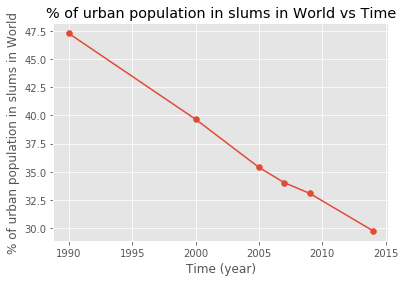

In [48]:
plot_country_data(df, "World", False, True, 1960, 2014, [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2008, 2010, 2011, 2012, 2013], "% of urban population in slums in World vs Time", "Time (year)", "% of urban population in slums in World", "world.png")


19
19
-0.7395731473503623
1518.762383069111


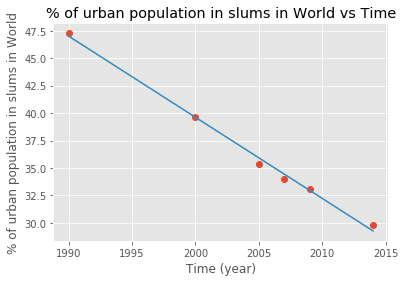

In [49]:
plot_country_data(df, "World", True, False, 1960, 2014, [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2008, 2010, 2011, 2012, 2013], "% of urban population in slums in World vs Time", "Time (year)", "% of urban population in slums in World", "worldline.png")


In [50]:
find_country_to_maximize_column(df, "2014")


214    South Sudan
Name: Country Name, dtype: object

0
0


/Users/pavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


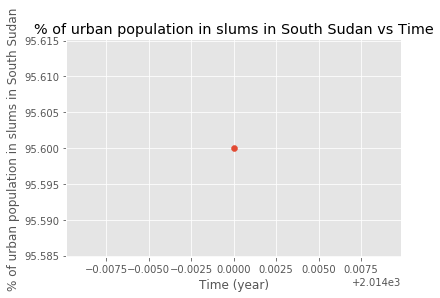

In [51]:
plot_country_data(df, "South Sudan", False, True, 1960, 2014, [], "% of urban population in slums in South Sudan vs Time", "Time (year)", "% of urban population in slums in South Sudan", "ssudan.png")


18
18


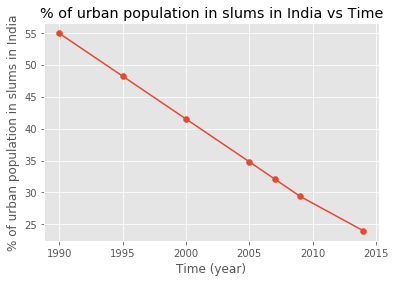

In [54]:
plot_country_data(df, "India", False, True, 1960, 2014, [1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2008, 2010, 2011, 2012, 2013], "% of urban population in slums in India vs Time", "Time (year)", "% of urban population in slums in India", "india.png")
